# Homework 4 (Dev Mody)
## Exercise 6 (Fraud Detection)

In this exercise, we will study Fraud Detection of Fake Bank Notes using the dataset available at `https://archive.ics.uci.edu/ml/datasets/banknote+authentication`. The goal of this exercise is to use Keras + TensorFlow to first perform logistic regression with a single neuron, analyze the results and then use a fcNN in Keras + TensorFlow to improve the results. In the dataset, the $P = 1372$ bank notes have been classified as fake or real. The notes have been scanned and a wavelet transform has been applied to each image. The resulting attributes of the dataset are the following:

1. Variance of Wavelet Transformed Image (Continuous)
2. Skewness of Wavelet Transformed Image (Continuous)
3. Curtosis of Wavelet Transformed Image (Continuous)
4. Entropy of Image (Continuous)
5. Class (0: Fake, 1: Real)

We can import the data directly from the archive site using:
```python
import numpy as np
from urllib.request import urlopen
url = ’http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentica
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)
```
Here, we want to plot the data using a simple 2D plot so we decide to only work with two features $x_1$ : skewness of wavelet transformed image and $x_2$ : entropy of wavelet transformed image. So we only select these two attributes along with the classification.
```python
X = dataset[:,[1,3]]
Y = dataset[:,4]
print(X.shape)
print(Y.shape)
```

### Exercise 6.1 (Data Plotting):
Use Matplotlib to make a 2D plot with the individual data points shown as symbols with different colours for the fake and real data classes. Can you visually separate the two classes by a straight line?

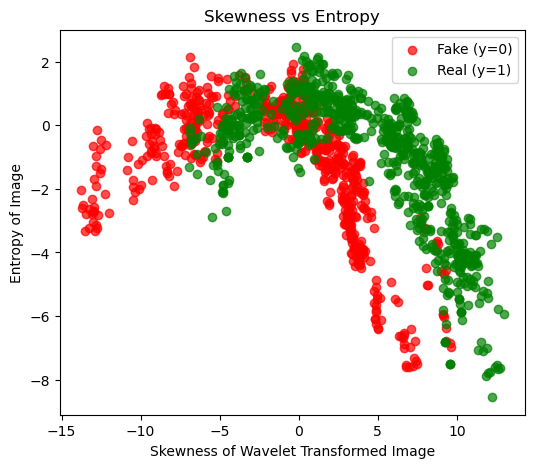

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")

X = dataset[:, [1,3]]
Y = dataset[:, 4]

fake_points = X[Y == 0]
real_points = X[Y == 1]

plt.figure(figsize=(6, 5))
plt.scatter(fake_points[:, 0], fake_points[:, 1], c='red', label='Fake (y=0)', alpha=0.7)
plt.scatter(real_points[:, 0], real_points[:, 1], c='green', label='Real (y=1)', alpha=0.7)
plt.xlabel('Skewness of Wavelet Transformed Image')
plt.ylabel('Entropy of Image')
plt.title('Skewness vs Entropy')
plt.legend()
plt.show()

### Exercise 6.2 (Logistic Regression):

Use Keras + TensorFlow to perform Logistic Regression on the data using a single neuron with sigmoid activation. This can be done using:
```python
Dense(1, batch_input_shape=(None, 2), activation='sigmoid')
```
Note the use of `batch_input_shape`. The `None` is used later for the actual batch size so this means we're expecting a yet to be determined number of rows each with 2 columns corresponding to $x_1$ and $x_2$. Compile the model using Stochastic Gradient Descent for the optimizer with a learning rate of 0.15 and `binary_crossentropy` for the loss. Train the model over 400 epochs with a batch size of 128. Use `history.history['accuracy']` and `history.history['loss']` to plot the accuracy and loss history. You can acess the history by using `history = model.fit(...)`. Is the logistic regression working well?

Epoch 1/400


2025-03-17 14:04:36.707270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 10ms/step - loss: 0.5878 - accuracy: 0.7121
Epoch 2/400
11/11 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7325
Epoch 3/400
11/11 [==============================] - 0s 4ms/step - loss: 0.5177 - accuracy: 0.7252
Epoch 4/400
11/11 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.7281
Epoch 5/400
11/11 [==============================] - 0s 4ms/step - loss: 0.5162 - accuracy: 0.7201
Epoch 6/400
11/11 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.7165
Epoch 7/400
11/11 [==============================] - 0s 5ms/step - loss: 0.5138 - accuracy: 0.7172
Epoch 8/400
11/11 [==============================] - 0s 5ms/step - loss: 0.5150 - accuracy: 0.7128
Epoch 9/400
11/11 [==============================] - 0s 5ms/step - loss: 0.5133 - accuracy: 0.7165
Epoch 10/400
11/11 [==============================] - 0s 6ms/step - loss: 0.5148 - accuracy: 0.7150
Epoch 11/400
11/11 [

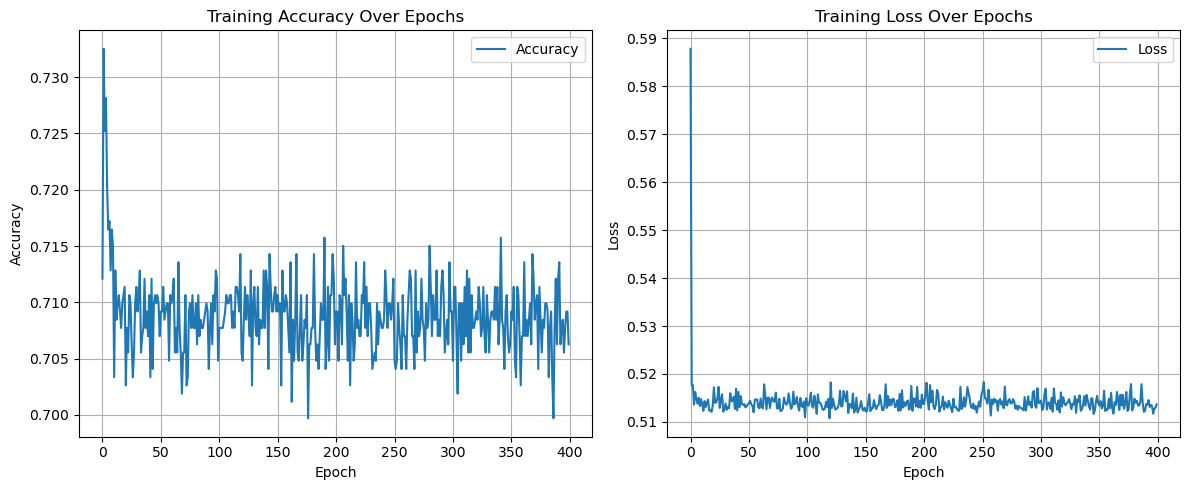

Final Training Accuracy (Logistic Regression) = 0.707


2025-03-17 14:04:56.326698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [15]:
model = Sequential([
    Dense(1, batch_input_shape=(None, 2), activation='sigmoid')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.15),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X, Y, epochs=400, batch_size=128, verbose=1)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

loss_lr, acc_lr = model.evaluate(X, Y, verbose=0)
print(f"Final Training Accuracy (Logistic Regression) = {acc_lr:.3f}")

### Exercise 6.3 (Visualization):
Now we want to visualize how things are working. Create linear arrays of 50 points along the $x_1$ and $x_2$ axis' using:
```python
x1_list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 50)
x2_list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 50)
```
This defines a grid in the 2D plane. Use `model.predict` to ealuate the model's prediction on the grid. Note that if you want to check a single point you need to ensure the shape is correct. For instance, you can use:
```python
model.predict(np.reshape(np.array([0.0,0.1]),(1,2)))
```
You need this since the individual points are expected to have the shape (1,2) - a row-vector instead of a column vector. Furthermore, since you're using a sigmoid activation, the model should predict numbers between 0 and 1. Then plot the results as a contour map using the Matplotlib function `plt.contourf`. Then, as you did above, plot the actual data points on top of the contour map using colour coding for the fake and real data points. Comment on your observations.

79/79 [==============================] - 0s 1ms/step


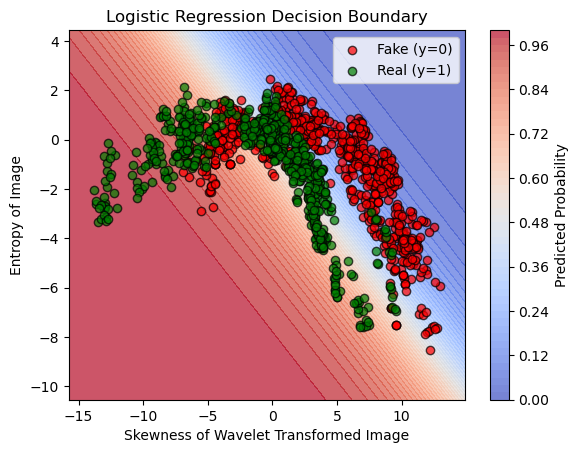

In [22]:
x1_list = np.linspace(np.min(X[:, 0]) - 2, np.max(X[:, 0]) + 2, 50)
x2_list = np.linspace(np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2, 50)
x1_grid, x2_grid = np.meshgrid(x1_list, x2_list)
grid_points = np.stack([x1_grid.ravel(), x2_grid.ravel()], axis=1)  # Shape: (2500, 2)

# Predict on grid
predictions = model.predict(grid_points)  # Shape: (2500, 1)
predictions = predictions.reshape(50, 50)  # Reshape to match grid

# Contour plot
plt.contourf(x1_grid, x2_grid, predictions, levels=50, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Predicted Probability')

# Overlay data points
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='red', label='Fake (y=0)', alpha=0.7, edgecolors='k')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='green', label='Real (y=1)', alpha=0.7, edgecolors='k')

plt.xlabel('Skewness of Wavelet Transformed Image')
plt.ylabel('Entropy of Image')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

### Exercise 6.4 (Improving the Model):
We now want to improve on the model by building a network with a hidden layer. First insert a dense layer of 8 neurons with sigmoid activation. Follow this layer with an output layer of 2 neurons with softmax activation. In this case, the output can be interpreted as a probabilities for fake and real. Furthermore, we convert to one-hot encoding for the labels so that we transform $y=0$ to (1, 0) and $y=1$ to (0, 1). This can be done using a keras utility in a simple way:
```python
Y_c = to_categorical(Y, 2)
``` 
Once this is done we can use `categorical_crossentropy` as the loss function, the same learning rate of 0.15 along with SGD for compiling the model. We have to use `categorical_crossentropy` as the loss function and not `sparse_categorical_crossentropy` since we have converted the labels to one-hot encoding. Build, compile and fit this model using 400 epochs and a batch size of 128. Plot the accuracy and loss over time. Comment on your results.

Epoch 1/400


2025-03-17 14:16:52.519446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 81ms/step - loss: 0.7765 - accuracy: 0.4745
Epoch 2/400
11/11 [==============================] - 0s 9ms/step - loss: 0.6026 - accuracy: 0.6144
Epoch 3/400
11/11 [==============================] - 0s 9ms/step - loss: 0.5718 - accuracy: 0.6224
Epoch 4/400
11/11 [==============================] - 0s 9ms/step - loss: 0.5537 - accuracy: 0.6611
Epoch 5/400
11/11 [==============================] - 0s 9ms/step - loss: 0.5416 - accuracy: 0.6633
Epoch 6/400
11/11 [==============================] - 0s 9ms/step - loss: 0.5311 - accuracy: 0.6895
Epoch 7/400
11/11 [==============================] - 0s 9ms/step - loss: 0.5229 - accuracy: 0.7012
Epoch 8/400
11/11 [==============================] - 0s 8ms/step - loss: 0.5137 - accuracy: 0.7092
Epoch 9/400
11/11 [==============================] - 0s 9ms/step - loss: 0.5066 - accuracy: 0.7172
Epoch 10/400
11/11 [==============================] - 0s 8ms/step - loss: 0.5008 - accuracy: 0.7289
Epoch 11/400
11/11 [

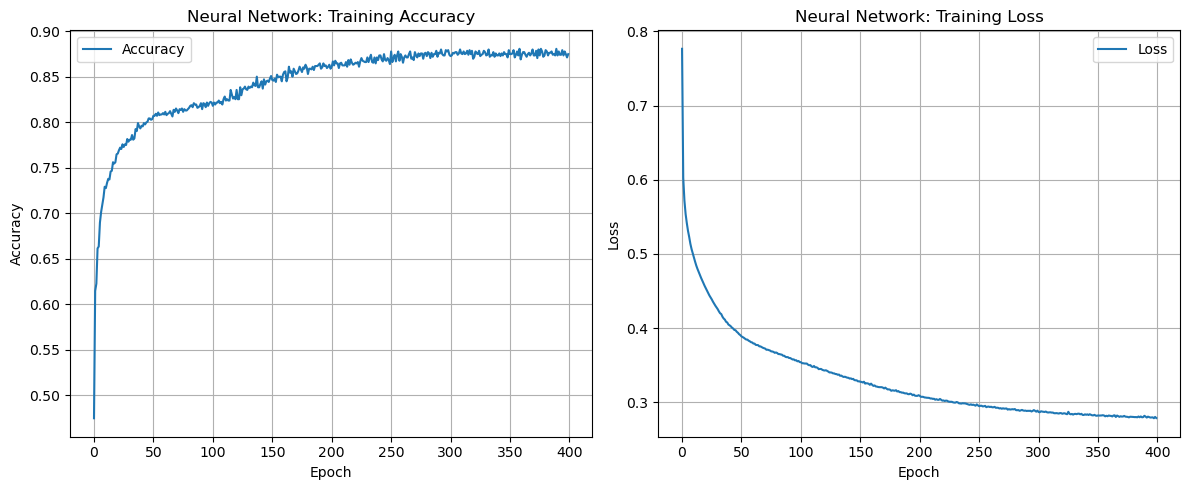

In [19]:
from tensorflow.keras.utils import to_categorical 

Y_c = to_categorical(Y, 2)  # Shape: (1372, 2)

# Define the improved model
model_nn = Sequential([
    Dense(8, batch_input_shape=(None, 2), activation='sigmoid'),  # Hidden layer
    Dense(2, activation='softmax')                                # Output layer
])

# Compile the model
model_nn.compile(optimizer=SGD(learning_rate=0.15),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history_nn = model_nn.fit(X, Y_c, epochs=400, batch_size=128, verbose=1)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_nn.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network: Training Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_nn.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network: Training Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 6.5 (Visualization 2.0):

In this case if we use `model.predict` we should get two numbers corresponding to probabilities for fake and real. As before in 6.3, use the probability for real to make a 2D contour plot of the predictions of the model with the actual data points super imposed. Compare your results to what was obtained with a single neuron and comment on the observations.

79/79 [==============================] - 0s 1ms/step


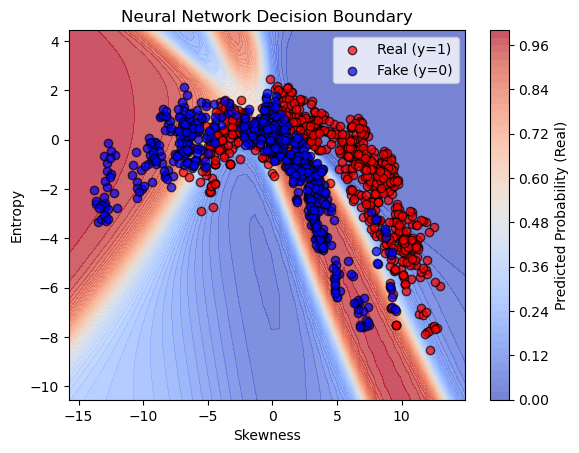

In [21]:
predictions_nn = model_nn.predict(grid_points)  # Shape: (2500, 2) - [P_fake, P_real]
predictions_nn_real = predictions_nn[:, 1].reshape(50, 50)  # Extract P_real and reshape

# Contour plot for neural network
plt.contourf(x1_grid, x2_grid, predictions_nn_real, levels=50, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Predicted Probability (Real)')
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='red', label='Real (y=1)', alpha=0.7, edgecolors='k')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='blue', label='Fake (y=0)', alpha=0.7, edgecolors='k')
plt.xlabel('Skewness')
plt.ylabel('Entropy')
plt.title('Neural Network Decision Boundary')
plt.legend()
plt.show()